In [524]:
import pandas as pd
import numpy as np
import copy as cp
import matplotlib.pyplot as plt
import seaborn as sns
import os
from natsort import natsorted, ns

In [23]:
"""
A script to evaulate an experiment and create plots accoringly. 

"""

'\nA script to evaulate an experiment and create plots accoringly. \n\n'

In [127]:
#set experiment folder as root dir of this script
experiment_folder = "./data/serious-exp/"
os.chdir(experiment_folder)

FileNotFoundError: [Errno 2] No such file or directory: './data/serious-exp/'

In [210]:
#set hyperparameters 
num_generations = 20
population_size = 20 
num_runs = 20


    

In [249]:
df = pd.DataFrame()
generation_identifiers = {}

for run in sorted(os.listdir(".")):
    if run[0].isdigit():
        #only use the run dirs 
        for filename in natsorted(os.listdir("./"+run+"/generations")):
            _generation_ids = pd.read_csv("./"+run+"/generations/"+filename+"/identifiers.txt", header=None)
            _generation_ids.rename({0: filename}, axis=1, inplace=True)
            if not f"{run}" in generation_identifiers:
                generation_identifiers[f"{run}"] = []
            generation_identifiers[f"{run}"].append(_generation_ids)

In [255]:
#contains the information about the phenotype ID of each generation
generation_identifiers['1'][0].head(3)

,generation_0
0,1
1,2
2,3


In [256]:
runs = {}
for run in range(1, num_runs+1):
    # cause run starts with 1 
    df = pd.DataFrame()
    for generation in range(num_generations):
        df = df.append(generation_identifiers[f"{run}"][generation][f"generation_{generation}"])
    runs[f"{run}"] = df

In [259]:
fitness_values = {}

for run in range(1, num_runs+1):
    fitness_values[f"{run}"] = pd.read_csv(f"{run}/data_fullevolution/fitness.csv", header=None)
    fitness_values[f"{run}"].rename({0:"Individual_ID", 1:"Distance to Target"}, axis=1, inplace=True)

In [441]:
# no exchange the phenotype ID with the fitness value 
fitness_df = pd.DataFrame()
for _run in runs:
    run_df = runs[_run]
    _fitness_df = cp.deepcopy(run_df.T)
    for gen in run_df.T:
        for index in range(len(run_df)):
            individual = int((_fitness_df[gen][int(index)]))
            fitness_value = fitness_values[str(_run)].T[(individual)]['Distance to Target']
            _fitness_df[gen][index] = fitness_value
            
    cur_run = np.ndarray(shape=(len(_fitness_df)))
    cur_run.fill(int(_run))
    _fitness_df['run'] = cur_run

    fitness_df = fitness_df.append(_fitness_df)

In [529]:
fitness_df.head(5)

,generation_0,generation_1,generation_2,generation_3,generation_4,generation_5,generation_6,generation_7,generation_8,generation_9,...,generation_11,generation_12,generation_13,generation_14,generation_15,generation_16,generation_17,generation_18,generation_19,run
0,4.611881e+07,200733.149153,2.111755e+01,1.900998e+02,1.432972e+05,2.182207e+01,9.831969e+01,1.751831e+17,1.751831e+17,1.751831e+17,...,1.751831e+17,1.751831e+17,1.751831e+17,1.751831e+17,1.751831e+17,1.751831e+17,1.751831e+17,1.751831e+17,1.751831e+17,1.0
1,2.658426e+01,220709.034857,6.098058e+04,6.619260e+01,3.984509e+01,1.839518e+01,1.751831e+17,1.303740e+08,1.178151e+07,1.751831e+17,...,3.343155e+01,4.591040e+07,1.751831e+17,1.751831e+17,1.751831e+17,7.181909e+07,3.744039e+06,6.401493e+01,1.751831e+17,1.0
2,1.879372e+02,9.756048,1.751831e+17,4.442892e+01,1.378536e+02,4.056707e+04,7.434960e+01,3.057512e+05,4.436826e+07,1.416866e+07,...,4.076750e+01,4.551528e+07,1.751831e+17,1.751831e+17,1.751831e+17,1.751831e+17,8.452887e+01,6.444491e+01,4.201204e+07,1.0
3,3.721740e+01,57.523816,2.293211e+05,1.751831e+17,1.751831e+17,4.313441e+07,1.751831e+17,5.741621e+01,1.751831e+17,4.410677e+03,...,1.751831e+17,1.102461e+04,1.751831e+17,1.468538e+07,1.751831e+17,1.751831e+17,9.556238e+00,1.751831e+17,1.751831e+17,1.0
4,7.818810e+01,212.750038,3.293716e+03,2.754660e+02,1.751831e+17,6.395132e+05,1.751831e+17,1.751831e+17,1.751831e+17,1.751831e+17,...,1.751831e+17,1.751831e+17,1.751831e+17,1.751831e+17,1.751831e+17,1.751831e+17,1.751831e+17,1.751831e+17,1.233063e+02,1.0


In [520]:
mean_dic = {}
std_dic = {}
min_dic = {}
max_dic = {}

for run in range(num_runs):
    for gen in fitness_df:
        mean_dic[gen] = fitness_df[gen].mean()
        std_dic[gen] = fitness_df[gen].std()
        min_dic[gen] = fitness_df[gen].min()
        max_dic[gen] = fitness_df[gen].max()
        
    
mean_df = pd.DataFrame(mean_dic, index=[0]).rename({0:"mean"})
std_df =  pd.DataFrame(std_dic, index=[0]).rename({0:"std"})
min_df =  pd.DataFrame(min_dic, index=[0]).rename({0:"min"})
max_df =  pd.DataFrame(max_dic, index=[0]).rename({0:"max"})   
result_df = mean_df.append(std_df).append(min_df).append(max_df).T

In [521]:
result_df

,mean,std,min,max
generation_0,2.452563e+15,2.058748e+16,7.727590,1.751831e+17
generation_1,3.240887e+15,2.361194e+16,1.000000,1.751831e+17
generation_2,4.729943e+15,2.840135e+16,1.000000,1.751831e+17
generation_3,5.255492e+15,2.989146e+16,1.000000,1.751831e+17
generation_4,8.058421e+15,3.670742e+16,1.000000,1.751831e+17
generation_5,1.086135e+16,4.225693e+16,1.000000,1.751831e+17
generation_6,1.103653e+16,4.257364e+16,1.000000,1.751831e+17
generation_7,1.094894e+16,4.241567e+16,4.000000,1.751831e+17
generation_8,1.261318e+16,4.529403e+16,7.610591,1.751831e+17
generation_9,1.454019e+16,4.834198e+16,11.106702,1.751831e+17


In [522]:
result_df.T.columns

Index(['generation_0', 'generation_1', 'generation_2', 'generation_3',
       'generation_4', 'generation_5', 'generation_6', 'generation_7',
       'generation_8', 'generation_9', 'generation_10', 'generation_11',
       'generation_12', 'generation_13', 'generation_14', 'generation_15',
       'generation_16', 'generation_17', 'generation_18', 'generation_19',
       'run'],
      dtype='object')

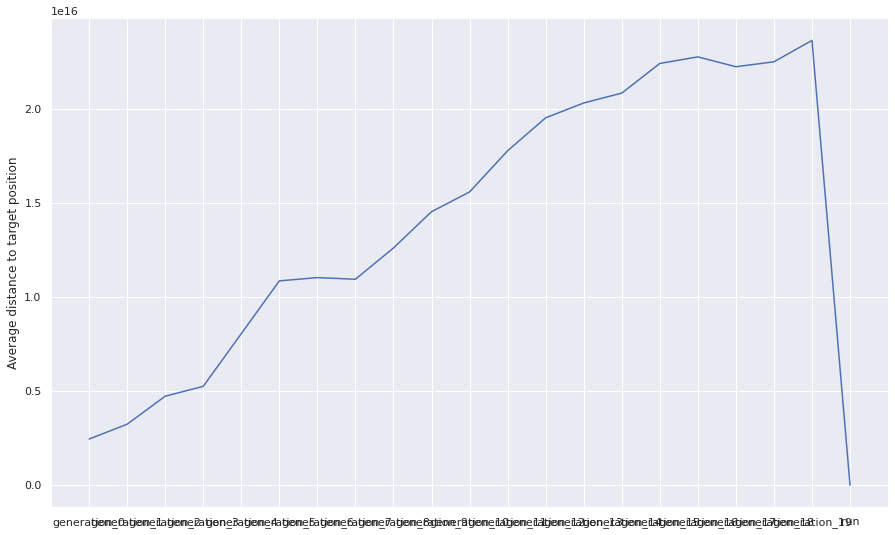

In [525]:
ax = sns.lineplot(x=result_df.T.columns, y=result_df['mean'], markers=True, dashes=True)
ax.set(ylabel='Average distance to target position')
sns.set(rc={'figure.figsize':(15,9)})
ax.figure.savefig("output.png")
plt.show()


<AxesSubplot:>

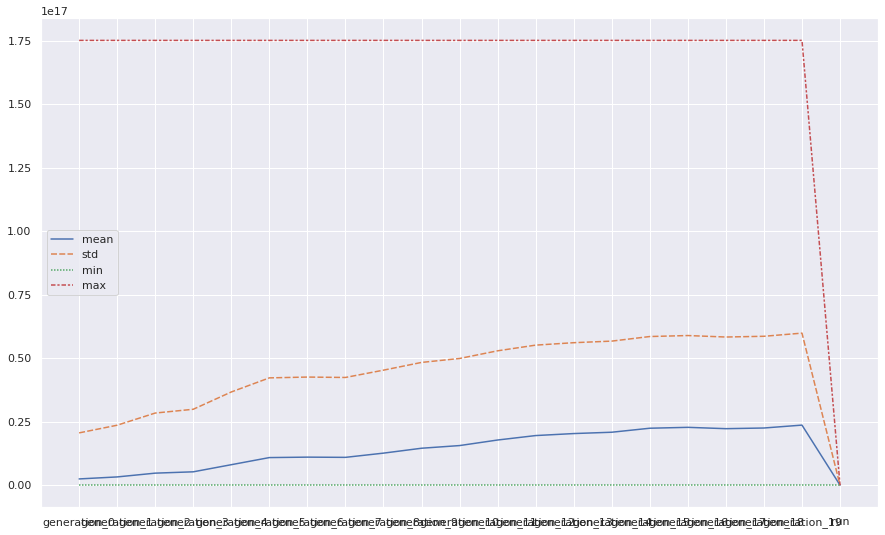

In [528]:
sns.lineplot(data=result_df)

In [855]:
fitness_mean = []
fitness_std = []
for i, val in enumerate(generation_identifiers):
    merged_gen = pd.merge(
        left=val,
        right=fitness_run_1,
        how="inner",
        on=None,
        left_on="generation_"+str(i),
        right_on="Individual_ID",
        left_index=False,
        right_index=False,
        sort=True,
        suffixes=("_x", "_y"),
        copy=True,
        indicator=False,
        validate=None,
    )
    gen_mean = merged_gen["Distance to Target"].mean()  
    gen_std = merged_gen["Distance to Target"].std()
    fitness_mean.append(gen_mean)
    fitness_std.append(gen_mean)

KeyError: 'generation_0'

In [856]:
import matplotlib.pyplot as plt

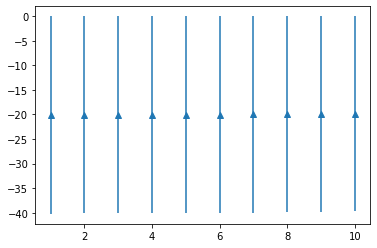

In [129]:
plt.errorbar(list(range(1,len(fitness_mean)+1)), fitness_mean, fitness_std,linestyle='None', marker='^')
plt.show()

In [692]:
max((result_df['max']))

-19.270146693442285

Individual_ID         41.00000
Distance to Target   -19.07879
Name: 40, dtype: float64

,Individual_ID,Distance to Target
40,41.0,-19.078790
40,41.0,-20.099967
40,41.0,-20.092420


In [750]:
run_1_best = fitness_run_1.T[40]
run_2_best = fitness_run_2.T[40]
run_3_best = fitness_run_3.T[40]


In [753]:
run_1_best['run'] = 1
run_2_best['run'] = 2
run_3_best['run'] = 3

In [754]:
best_pheno_df = pd.DataFrame(run_1_best).T.append(run_2_best).append(run_3_best)

In [784]:
best_pheno_df = best_pheno_df.reset_index(drop=True)

In [760]:
best = best_pheno_df['Distance to Target'].mean()
std = best_pheno_df['Distance to Target'].std()

In [785]:
fit = best_pheno_df['Distance to Target']
fit

0   -19.078790
1   -20.099967
2   -20.092420
Name: Distance to Target, dtype: float64

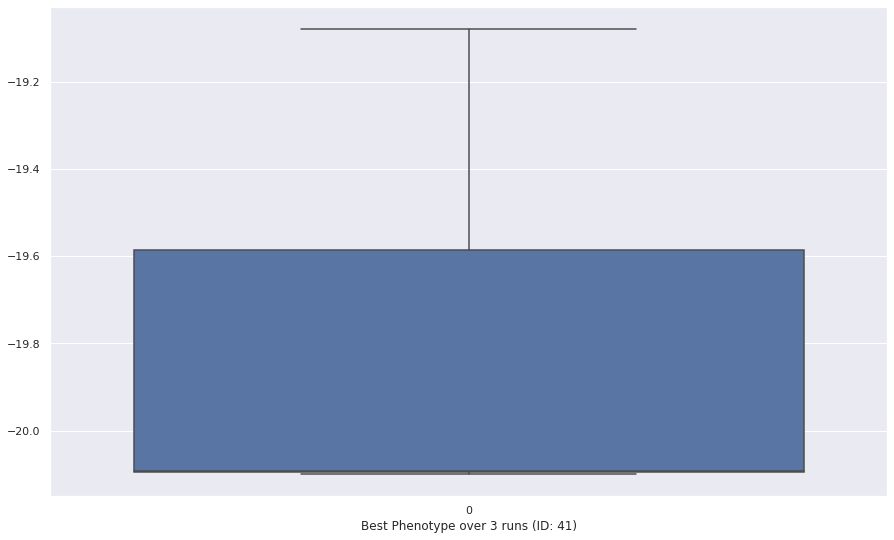

In [807]:
ax = sns.boxplot(data=best_pheno_df['Distance to Target'])
ax.set(xlabel='Best Phenotype over 3 runs (ID: 41)')
ax.figure.savefig('best_phenotype_41.png')